In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import graphviz

In [4]:
data=pd.read_csv('twitchdata-update.csv', header='infer')

In [5]:
data

,Warmblooded,gives birth,Aquatic creature,Aerial Creature,Has legs,Hibernates,class
0,1,1,0,0,1,0,Mammal
1,0,0,0,0,0,1,Reptile
2,0,0,1,0,0,0,Fish
3,1,1,1,0,0,0,Mammal
4,0,0,1,0,1,1,Amphibian
5,0,0,0,0,1,0,Reptile
6,1,1,0,1,1,1,Mammal
7,1,0,0,1,1,0,Bird
8,1,1,0,0,1,0,Mammal
9,0,1,1,0,0,0,Mammal


In [6]:
data['class']=data['class'].replace(['Fish','Bird','Amphibian','Reptile'], 'non-mammals')

In [7]:
data

,Warmblooded,gives birth,Aquatic creature,Aerial Creature,Has legs,Hibernates,class
0,1,1,0,0,1,0,Mammal
1,0,0,0,0,0,1,non-mammals
2,0,0,1,0,0,0,non-mammals
3,1,1,1,0,0,0,Mammal
4,0,0,1,0,1,1,non-mammals
5,0,0,0,0,1,0,non-mammals
6,1,1,0,1,1,1,Mammal
7,1,0,0,1,1,0,non-mammals
8,1,1,0,0,1,0,Mammal
9,0,1,1,0,0,0,Mammal


In [8]:
pd.crosstab([data['Warmblooded'],data['gives birth']], data['class'])

class                    Mammal  non-mammals
Warmblooded gives birth                     
0           0                 0            7
            1                 1            0
1           0                 0            2
            1                 5            0

# Building the Decision Tree Classifier

In [9]:
from sklearn import tree

In [10]:
y= data['class']

In [11]:
y

0          Mammal
1     non-mammals
2     non-mammals
3          Mammal
4     non-mammals
5     non-mammals
6          Mammal
7     non-mammals
8          Mammal
9          Mammal
10    non-mammals
11    non-mammals
12         Mammal
13    non-mammals
14    non-mammals
Name: class, dtype: object

In [12]:
X= data.drop('class',axis=1)

In [13]:
X

,Warmblooded,gives birth,Aquatic creature,Aerial Creature,Has legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [14]:
type(y)

pandas.core.series.Series

In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
clf= tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
clf=clf.fit(X,y)

In [19]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
import pydotplus

In [21]:
import pydotplus

In [22]:
from IPython.display import Image

In [23]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Mammal','non-mammals'], filled= True,out_file=None)

In [24]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="gives birth <= 0.5\\nentropy = 0.971\\nsamples = 15\\nvalue = [6, 9]\\nclass = non-mammals", fillcolor="#bddef6"] ;\n1 [label="entropy = 0.0\\nsamples = 9\\nvalue = [0, 9]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 6\\nvalue = [6, 0]\\nclass = Mammal", fillcolor="#e58139"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [25]:
graph= pydotplus.graph_from_dot_data(dot_data)

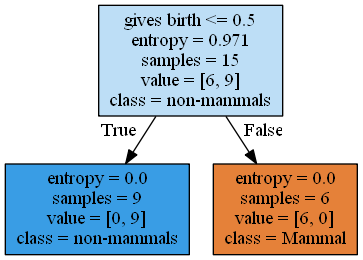

In [26]:
Image(graph.create_png())

# using the DT to classify new Datasets

In [27]:
testdata=[[0,0,0,0,1,1,'non-mammals'],[1,0,0,0,1,1,'mammal'],[1,0,0,1,1,0,'non-mammals'],[1,1,1,0,0,0,'mammal']]

In [28]:
testdata

[[0, 0, 0, 0, 1, 1, 'non-mammals'],
 [1, 0, 0, 0, 1, 1, 'mammal'],
 [1, 0, 0, 1, 1, 0, 'non-mammals'],
 [1, 1, 1, 0, 0, 0, 'mammal']]

In [30]:
testdata=pd.DataFrame(testdata,columns=data.columns)

In [31]:
testdata

,Warmblooded,gives birth,Aquatic creature,Aerial Creature,Has legs,Hibernates,class
0,0,0,0,0,1,1,non-mammals
1,1,0,0,0,1,1,mammal
2,1,0,0,1,1,0,non-mammals
3,1,1,1,0,0,0,mammal


In [32]:
testY=testdata['class']

In [34]:
testY

0    non-mammals
1         mammal
2    non-mammals
3         mammal
Name: class, dtype: object

In [38]:
testX= testdata.drop('class', axis=1)

In [39]:
testX

,Warmblooded,gives birth,Aquatic creature,Aerial Creature,Has legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


In [40]:
predictY=clf.predict(testX)

In [41]:
predictY

array(['non-mammals', 'non-mammals', 'non-mammals', 'Mammal'],
      dtype=object)

In [42]:
3/4*100

75.0

In [44]:
prediction=pd.concat([testdata['class'],pd.Series(predictY,name='Predicted Class')], axis=1)

In [45]:
prediction 

,class,Predicted Class
0,non-mammals,non-mammals
1,mammal,non-mammals
2,non-mammals,non-mammals
3,mammal,Mammal


In [46]:
from sklearn.metrics import accuracy_score

In [48]:
print('Accuracy on test data is %.2f'%(accuracy_score(testY,predictY)*100))

Accuracy on test data is 50.00
